In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. CARGAR Y LIMPIAR DATOS
# -----------------------------------------------------------

file_path = "/mnt/data/HUMEDAD.txt"   # Ruta del archivo cargado
raw = pd.read_csv(file_path, sep="\t", header=None, names=["col"], engine="python")

# Filtrar filas que contienen valores numéricos reales
clean_rows = raw["col"].str.contains(r'^\d+', regex=True)
data = raw[clean_rows]["col"].str.split("\t", expand=True)
data.columns = ["AO", "Humedad", "Estado"]

# Convertir columnas numéricas
data["AO"] = pd.to_numeric(data["AO"], errors="coerce")
data["Humedad"] = pd.to_numeric(data["Humedad"], errors="coerce")

# Quitar filas vacías
data = data.dropna()

# -----------------------------------------------------------
# 2. FUNCIÓN PARA CLASIFICAR NUEVOS DATOS
# -----------------------------------------------------------

def clasificar_humedad(h):
    if h < 70:
        return "SECO"
    elif 70 <= h < 80:
        return "MEDIO"
    elif 80 <= h < 90:
        return "OPTIMO"
    else:
        return "EXCESO"

# -----------------------------------------------------------
# 3. PERMITIR AL USUARIO INGRESAR NUEVOS DATOS
# -----------------------------------------------------------

while True:
    opcion = input("¿Desea ingresar una nueva lectura? (s/n): ")
    if opcion.lower() != "s":
        break
    ao = float(input("Ingrese el valor AO del sensor Arduino: "))
    humedad = float(input("Ingrese humedad (%): "))
    estado = clasificar_humedad(humedad)

    nueva_fila = pd.DataFrame({"AO":[ao], "Humedad":[humedad], "Estado":[estado]})
    data = pd.concat([data, nueva_fila], ignore_index=True)
    print(f"Estado clasificado: {estado}")

# -----------------------------------------------------------
# 4. MOSTRAR ESTADÍSTICAS
# -----------------------------------------------------------

print("\nRESUMEN DE DATOS")
print(data.describe())

print("\nConteo por estados:")
print(data["Estado"].value_counts())

# -----------------------------------------------------------
# 5. GRAFICAR DATOS
# -----------------------------------------------------------

plt.figure(figsize=(12,5))
plt.plot(data["Humedad"], linewidth=2)
plt.title("Evolución de la Humedad del Vermicompost")
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Humedad (%)")
plt.grid()
plt.show()

# GRAFICA DE ESTADOS
plt.figure(figsize=(12,5))
plt.scatter(range(len(data)), data["Humedad"], c=data["Estado"].astype("category").cat.codes)
plt.title("Estados de Humedad")
plt.xlabel("Tiempo")
plt.ylabel("Humedad (%)")
plt.show()

# -----------------------------------------------------------
# 6. GUARDAR RESULTADOS LIMPIOS
# -----------------------------------------------------------

data.to_csv("humedad_procesada.csv", index=False)
print("\nArchivo guardado: humedad_procesada.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/HUMEDAD.txt'

¿Desea ingresar una nueva lectura? (s/n):  n



RESUMEN DE DATOS
         AO Humedad Estado
count     0       0      0
unique    0       0      0
top     NaN     NaN    NaN
freq    NaN     NaN    NaN

Conteo por estados:
Series([], Name: count, dtype: int64)


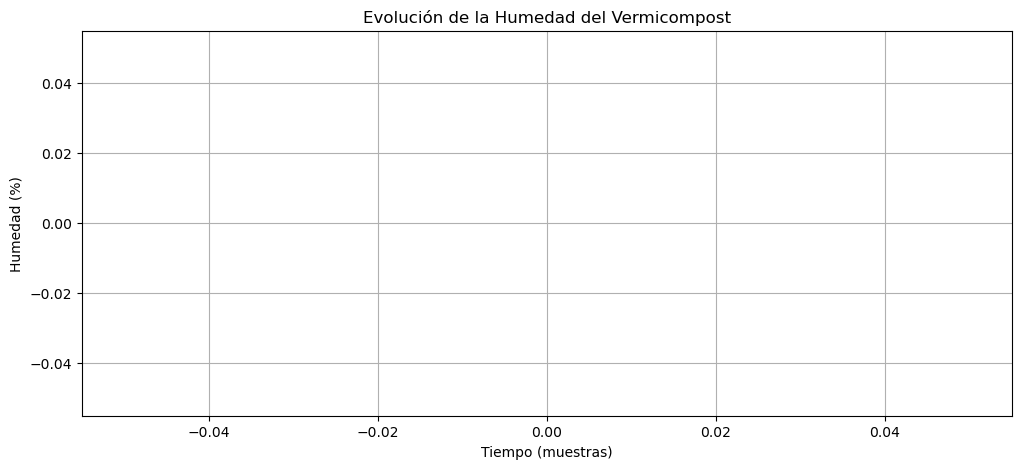

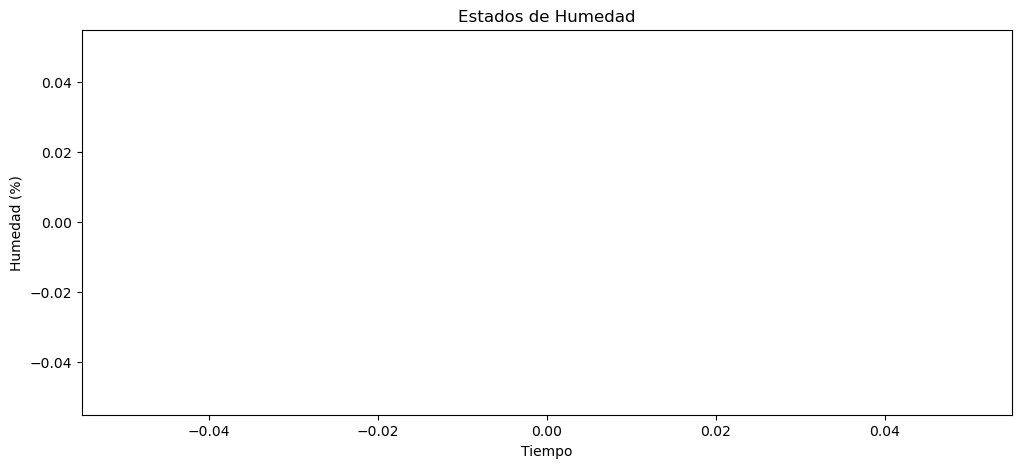


Archivo guardado: humedad_procesada.csv


In [1]:
# First, import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. CARGAR DATOS
# -----------------------------------------------------------

# Create an empty DataFrame instead of trying to read from a file
# You can either create a new file or use an empty DataFrame to start
data = pd.DataFrame(columns=["AO", "Humedad", "Estado"])

# Alternatively, if you have the file but in a different location, specify the correct path:
# data = pd.read_csv("HUMEDAD.txt")  # If it's in the current directory
# Or create sample data to work with
# data = pd.DataFrame({"AO": [100, 200, 300], "Humedad": [65, 75, 85], "Estado": ["SECO", "MEDIO", "OPTIMO"]})

# -----------------------------------------------------------
# 2. FUNCIÓN PARA CLASIFICAR HUMEDAD
# -----------------------------------------------------------

def clasificar_humedad(h):
    if h < 70:
        return "SECO"
    elif 70 <= h < 80:
        return "MEDIO"
    elif 80 <= h < 90:
        return "OPTIMO"
    else:
        return "EXCESO"

# -----------------------------------------------------------
# 3. PERMITIR AL USUARIO INGRESAR NUEVOS DATOS
# -----------------------------------------------------------

while True:
    opcion = input("¿Desea ingresar una nueva lectura? (s/n): ")
    if opcion.lower() != "s":
        break
    ao = float(input("Ingrese el valor AO del sensor Arduino: "))
    humedad = float(input("Ingrese humedad (%): "))
    estado = clasificar_humedad(humedad)

    nueva_fila = pd.DataFrame({"AO":[ao], "Humedad":[humedad], "Estado":[estado]})
    data = pd.concat([data, nueva_fila], ignore_index=True)
    print(f"Estado clasificado: {estado}")

# -----------------------------------------------------------
# 4. MOSTRAR ESTADÍSTICAS
# -----------------------------------------------------------

print("\nRESUMEN DE DATOS")
print(data.describe())

print("\nConteo por estados:")
print(data["Estado"].value_counts())

# -----------------------------------------------------------
# 5. GRAFICAR DATOS
# -----------------------------------------------------------

plt.figure(figsize=(12,5))
plt.plot(data["Humedad"], linewidth=2)
plt.title("Evolución de la Humedad del Vermicompost")
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Humedad (%)")
plt.grid()
plt.show()

# GRAFICA DE ESTADOS
plt.figure(figsize=(12,5))
plt.scatter(range(len(data)), data["Humedad"], c=data["Estado"].astype("category").cat.codes)
plt.title("Estados de Humedad")
plt.xlabel("Tiempo")
plt.ylabel("Humedad (%)")
plt.show()

# -----------------------------------------------------------
# 6. GUARDAR RESULTADOS LIMPIOS
# -----------------------------------------------------------

data.to_csv("humedad_procesada.csv", index=False)
print("\nArchivo guardado: humedad_procesada.csv")